<a href="https://colab.research.google.com/github/crazygovind/AI-Foundation-Whitehat-Jr/blob/master/59_Project_car_prediction_data_exploration_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Car Prediction - Data exploration
 
 
 

---

### Problem Statement

The most important factor for an Insurance Company is to determine what premium charges must be paid by an individual. The charges depend on various factors like age, gender, income, etc. 

Build a model that is capable of predicting the insurance charges a person has to pay depending on the given features using multiple linear regression. 

---

### List of Activities
 
**Activity 1:** Analysing the Dataset

**Activity 2:** Feature Encoding

**Activity 3:** Exploratory Data Analysis

**Activity 4:** Train-Test Split
 
**Activity 5:** Model Training using `statsmodels.api`



 


---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Insurance** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|age|Age of primary beneficiary|
|sex|Insurance contractor gender, female or male|
|bmi|Body mass index|
|children|Number of children covered by health insurance/number of dependents|
|region|Beneficiary's residential area in the US, northeast, southeast, southwest, northwest|
|charges|Individual medical costs billed by health insurance|


  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/insurance_dataset.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Create a regression plot with `age` on X-axis and `charges` on Y-axis to identify the relationship between these two attributes.




In [15]:
# Import modules
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/insurance_dataset.csv')
# Print first five rows using head() function
df.head()

,age,sex,bmi,children,region,charges
0,18,male,33.770,1,southeast,1725.55230
1,28,male,33.000,3,southeast,4449.46200
2,33,male,22.705,0,northwest,21984.47061
3,32,male,28.880,0,northwest,3866.85520
4,31,female,25.740,0,southeast,3756.62160


In [16]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
region      0
charges     0
dtype: int64

In [17]:
# Print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   region    1064 non-null   object 
 5   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 50.0+ KB


----

#### Activity 2 : Feature Encoding

The `sex` and `region` columns are categorical attributes. Convert these attributes into numerical ones so that they can be used for linear regression analysis using `map()` function. 

- Map the following values for the `sex` column:

  - `male` to `0`
  - `female` to `1`

- Map the following values for the `region` column:

 - `southeast` to `1`
 - `southwest` to `2`
 - `northeast` to `3`
 - `northwest` to `4`


In [18]:
# Count the occurrence of each value in the 'sex' column.
df['sex'].value_counts()

female    547
male      517
Name: sex, dtype: int64

In [19]:
# Use the 'map()' function to replace values in 'sex' column to their corresponding numeric values.


df['sex']=df['sex'].replace({'male':0,'female':1})
df['sex']

0       0
1       0
2       0
3       0
4       1
       ..
1059    1
1060    0
1061    1
1062    1
1063    1
Name: sex, Length: 1064, dtype: int64

In [20]:
# Again count the occurrence of each value in the 'sex' column to verify whether all values are correctly mapped
df['sex'].value_counts()

1    547
0    517
Name: sex, dtype: int64

In [21]:
# Count the occurrence of each value in the 'region' column.
df['region'].value_counts()

southeast    273
northwest    267
southwest    267
northeast    257
Name: region, dtype: int64

In [22]:
# Use the 'map()' function to replace a value in the 'region' column to their corresponding numeric values.


df['region']=df['region'].replace({'southeast':1,'southwest':2,'northeast':3,'northwest':4})
df['region']

0       1
1       1
2       4
3       4
4       1
       ..
1059    2
1060    4
1061    3
1062    1
1063    2
Name: region, Length: 1064, dtype: int64

In [23]:
# Again count the occurrence of each value in the 'region' column to verify whether all values are correctly mapped
df['region'].value_counts()

1    273
4    267
2    267
3    257
Name: region, dtype: int64

---

#### Activity 3: Exploratory Data Analysis


Create the heat-map to look into the correlation of the features

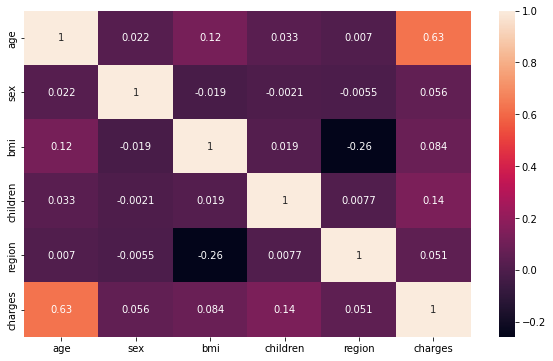

In [24]:
# Draw a correlation heatmap between the features.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

---

#### Activity 4: Train-Test Split


Split the dataset into training set and test set such that the training set contains 67% of the instances and the remaining instances will become the test set and keep the `charges` as the target variables.

In [25]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split

features=list(df.columns)
features.remove('charges')
print(features)

X=df[features]
y=df['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

['age', 'sex', 'bmi', 'children', 'region']


In [ ]:
# Create separate data-frames for the feature and target variables for both the train and test sets.

---

#### Activity 5: Model Training using `statsmodels.api`

Now build a multiple linear regression model using the `statsmodels.api` module.
Also, print the summary of the linear regression model built.

In [26]:
#  Build a linear regression model using all the features to predict insurance charges.
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const      -4516.804753
age          255.783127
sex          596.474438
bmi           32.531515
children     591.431434
region       347.830037
dtype: float64

In [28]:
# Print the summary of the linear regression report.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     92.65
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           5.67e-75
Time:                        19:30:14   Log-Likelihood:                -7018.7
No. Observations:                 712   AIC:                         1.405e+04
Df Residuals:                     706   BIC:                         1.408e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4516.8048   1165.545     -3.875      0.0




**Q:** What is the $R^2$ value?

**A:** 0.396


**Q:** Is there multicollinearity in the model?

**A:** No




---